## 2. 모델 업데이트하기

- 기본 코드 불러오기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 참조 : https://www.tensorflow.org/tutorials/keras/regression?hl=ko

# 데이터를 입력합니다.
df = pd.read_csv('https://raw.githubusercontent.com/gilbutITbook/080324/master/data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [2]:
#model.get_config()

### 모델의 저장 설정 및 실행

In [3]:
# 모델 저장의 조건을 설정합니다.
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다. 
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=1, callbacks=[checkpointer])
#verbose 이차이가 다르다, 0, 1, 2 => 출력 결과물이 다르게 나온다.

Epoch 1/50
1/8 [==>...........................] - ETA: 1s - loss: 0.7721 - accuracy: 0.7460
Epoch 1: saving model to ./data/model/all\01-0.7800.hdf5
8/8 [==============================] - 0s 17ms/step - loss: 0.6038 - accuracy: 0.7516 - val_loss: 0.5024 - val_accuracy: 0.7800
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 0.4825 - accuracy: 0.7820
Epoch 2: saving model to ./data/model/all\02-0.8185.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 0.4870 - accuracy: 0.7780 - val_loss: 0.4210 - val_accuracy: 0.8185
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 0.4325 - accuracy: 0.7960
Epoch 3: saving model to ./data/model/all\03-0.8462.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 0.4006 - accuracy: 0.8116 - val_loss: 0.3413 - val_accuracy: 0.8462
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 0.3250 - accuracy: 0.8580
Epoch 4: saving model to ./data/model/all\04-0.8869.hdf5
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.1694 - accuracy: 0.9389 - val_loss: 0.1720 - val_accuracy: 0.9431
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 0.1692 - accuracy: 0.9400
Epoch 31: saving model to ./data/model/all\31-0.9431.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 0.1660 - accuracy: 0.9405 - val_loss: 0.1711 - val_accuracy: 0.9431
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 0.1460 - accuracy: 0.9460
Epoch 32: saving model to ./data/model/all\32-0.9423.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 0.1643 - accuracy: 0.9397 - val_loss: 0.1743 - val_accuracy: 0.9423
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 0.1393 - accuracy: 0.9580
Epoch 33: saving model to ./data/model/all\33-0.9446.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 0.1629 - accuracy: 0.9428 - val_loss: 0.1678 - val_accuracy: 0.9446
Epoch 34/50
1/8 [==>...................

In [4]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 641us/step - loss: 0.1317 - accuracy: 0.9515
Test accuracy: 0.9515384435653687


In [19]:
from glob import glob
import tensorflow as tf

model_List = glob('.\\data\\model\\all\\*.hdf5')

for i in model_List:
    
    loadModel = tf.keras.models.load_model(i)
    score=loadModel.evaluate(X_test, y_test)
    print(i)
    print('Test accuracy:', score[1])
    

# 테스트 90 이상 것만 뽑아서 하기

41/41 [==============================] - 0s 673us/step - loss: 0.5331 - accuracy: 0.7646
.\data\model\all\01-0.7800.hdf5
Test accuracy: 0.7646153569221497
41/41 [==============================] - 0s 802us/step - loss: 0.0344 - accuracy: 0.9885
.\data\model\all\01-0.9885.hdf5
Test accuracy: 0.9884615540504456
41/41 [==============================] - 0s 627us/step - loss: 0.4382 - accuracy: 0.8000
.\data\model\all\02-0.8185.hdf5
Test accuracy: 0.800000011920929
41/41 [==============================] - 0s 623us/step - loss: 0.0303 - accuracy: 0.9892
.\data\model\all\02-0.9854.hdf5
Test accuracy: 0.989230751991272
41/41 [==============================] - 0s 578us/step - loss: 0.3573 - accuracy: 0.8308
.\data\model\all\03-0.8462.hdf5
Test accuracy: 0.8307692408561707
41/41 [==============================] - 0s 605us/step - loss: 0.0351 - accuracy: 0.9877
.\data\model\all\03-0.9838.hdf5
Test accuracy: 0.9876922965049744
41/41 [==============================] - 0s 666us/step - loss: 0.3032 - 

41/41 [==============================] - 0s 646us/step - loss: 0.0305 - accuracy: 0.9900
.\data\model\all\27-0.9869.hdf5
Test accuracy: 0.9900000095367432
41/41 [==============================] - 0s 621us/step - loss: 0.1750 - accuracy: 0.9354
.\data\model\all\28-0.9408.hdf5
Test accuracy: 0.9353846311569214
41/41 [==============================] - 0s 638us/step - loss: 0.0313 - accuracy: 0.9892
.\data\model\all\28-0.9854.hdf5
Test accuracy: 0.989230751991272
41/41 [==============================] - 0s 577us/step - loss: 0.1746 - accuracy: 0.9338
.\data\model\all\29-0.9423.hdf5
Test accuracy: 0.9338461756706238
41/41 [==============================] - 0s 704us/step - loss: 0.0303 - accuracy: 0.9900
.\data\model\all\29-0.9869.hdf5
Test accuracy: 0.9900000095367432
41/41 [==============================] - 0s 605us/step - loss: 0.1707 - accuracy: 0.9362
.\data\model\all\30-0.9431.hdf5
Test accuracy: 0.9361538290977478
41/41 [==============================] - 0s 621us/step - loss: 0.0301 -

In [8]:
model.save('test.h5') # 학습된 모델을 저장 하는 방법 포멧은 h5로 저장

In [10]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
2337,7.1,0.21,0.31,3.80,0.021,40.0,142.0,0.99215,3.17,0.39,10.8,7
6061,7.1,0.42,0.20,2.80,0.038,28.0,109.0,0.98968,3.23,0.47,13.4,6
3500,7.4,0.21,0.30,7.90,0.039,14.0,118.0,0.99420,2.96,0.34,10.4,5
4051,7.3,0.19,0.27,1.60,0.027,35.0,136.0,0.99248,3.38,0.54,11.0,7
3777,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5


In [11]:
model.predict(X_test[:1])

#데이터 디멘션이 다르다, 1차원과 2차원의 문제이기 때문에, 차원 잘 보기
#예측값을 넣어주실땐 2차원으로 넣어줘야 한다.

1/1 [==============================] - 0s 42ms/step


array([[0.00014264]], dtype=float32)

In [14]:
#임계값을 바꿔가면서 적용해본다.

valid =[0.4,0.5,0.6,0.7,0.8] #임계값을 바꿔가면서 예측을 맞췄는지 확인해본다.

for x in valid:
    result = model.predict(X_test)
    result[result < x] = 0
    result[result >= x] = 1
    
    print(x, np.unique(y_test==result[:,0], return_counts=True))

41/41 [==============================] - 0s 452us/step
0.4 (array([False,  True]), array([  26, 1274], dtype=int64))
41/41 [==============================] - 0s 522us/step
0.5 (array([False,  True]), array([  18, 1282], dtype=int64))
41/41 [==============================] - 0s 473us/step
0.6 (array([False,  True]), array([  17, 1283], dtype=int64))
41/41 [==============================] - 0s 450us/step
0.7 (array([False,  True]), array([  13, 1287], dtype=int64))
41/41 [==============================] - 0s 609us/step
0.8 (array([False,  True]), array([  15, 1285], dtype=int64))


## 3. 그래프로 과적합 확인하기

In [6]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [7]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.135033,0.950988,0.144893,0.952308
1,0.133887,0.952784,0.143780,0.953846
2,0.133180,0.951245,0.142773,0.953846
3,0.132143,0.952784,0.143705,0.954615
4,0.131333,0.953297,0.142665,0.953846
...,...,...,...,...
1995,0.029641,0.992302,0.081082,0.983077
1996,0.032293,0.992045,0.073643,0.983846
1997,0.032022,0.991019,0.078309,0.982308
1998,0.030477,0.991275,0.075859,0.982308


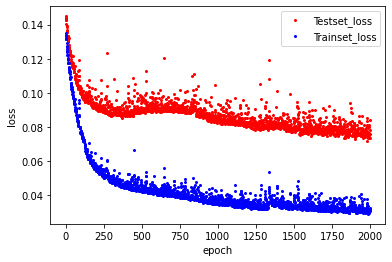

In [9]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 4. 학습의 자동 중단
-기본 코드 불러오기

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('https://raw.githubusercontent.com/gilbutITbook/080324/master/data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 12ms/step - loss: 13.1152 - accuracy: 0.2471 - val_loss: 8.0808 - val_accuracy: 0.2485
Epoch 2/2000
8/8 [==============================] - 0s 5ms/step - loss: 4.8783 - accuracy: 0.2428 - val_loss: 1.2162 - val_accuracy: 0.2462
Epoch 3/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.8219 - accuracy: 0.4493 - val_loss: 0.4689 - val_accuracy: 0.7846
Epoch 4/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.4179 - accuracy: 0.7734 - val_loss: 0.3735 - val_accuracy: 0.7677
Epoch 5/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.3870 - accuracy: 0.7655 - val_loss: 0.3644 - val_accuracy: 0.7700
Epoch 6/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.3783 - accuracy: 0.7762 - val_loss: 0.3531 - val_accuracy: 0.7938
Epoch 7/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.3665 - accuracy: 0.8093 - val_loss: 0.3492 - val_accuracy: 0.8346
Epoch 8/2000
8/8 [

8/8 [==============================] - 0s 3ms/step - loss: 0.1071 - accuracy: 0.9610 - val_loss: 0.1097 - val_accuracy: 0.9662
Epoch 118/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.1089 - accuracy: 0.9625 - val_loss: 0.1033 - val_accuracy: 0.9662
Epoch 119/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.1065 - accuracy: 0.9633 - val_loss: 0.1034 - val_accuracy: 0.9608
Epoch 120/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.1074 - accuracy: 0.9630 - val_loss: 0.1014 - val_accuracy: 0.9646
Epoch 121/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.1053 - accuracy: 0.9628 - val_loss: 0.1067 - val_accuracy: 0.9700
Epoch 122/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.1065 - accuracy: 0.9620 - val_loss: 0.1005 - val_accuracy: 0.9677
Epoch 123/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9641 - val_loss: 0.1000 - val_accuracy: 0.9646
Epoch 124/2000
8/8 [=

Epoch 175/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9733 - val_loss: 0.0781 - val_accuracy: 0.9792
Epoch 176/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0797 - accuracy: 0.9736 - val_loss: 0.0765 - val_accuracy: 0.9769
Epoch 177/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0809 - accuracy: 0.9749 - val_loss: 0.0779 - val_accuracy: 0.9762
Epoch 178/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0801 - accuracy: 0.9728 - val_loss: 0.0758 - val_accuracy: 0.9762
Epoch 179/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0793 - accuracy: 0.9728 - val_loss: 0.0752 - val_accuracy: 0.9777
Epoch 180/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0808 - accuracy: 0.9731 - val_loss: 0.0767 - val_accuracy: 0.9769
Epoch 181/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.9743 - val_loss: 0.0760 - val_accuracy: 0.9769
Epoch 

Epoch 233/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0665 - accuracy: 0.9808 - val_loss: 0.0635 - val_accuracy: 0.9800
Epoch 234/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9795 - val_loss: 0.0667 - val_accuracy: 0.9785
Epoch 235/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0717 - accuracy: 0.9782 - val_loss: 0.0644 - val_accuracy: 0.9785
Epoch 236/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0640 - accuracy: 0.9805 - val_loss: 0.0619 - val_accuracy: 0.9815
Epoch 237/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0644 - accuracy: 0.9797 - val_loss: 0.0613 - val_accuracy: 0.9823
Epoch 238/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0623 - accuracy: 0.9800 - val_loss: 0.0611 - val_accuracy: 0.9815
Epoch 239/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0642 - accuracy: 0.9810 - val_loss: 0.0609 - val_accuracy: 0.9815
Epoch 

Epoch 291/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9831 - val_loss: 0.0559 - val_accuracy: 0.9831
Epoch 292/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9836 - val_loss: 0.0578 - val_accuracy: 0.9785
Epoch 293/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0570 - accuracy: 0.9843 - val_loss: 0.0543 - val_accuracy: 0.9838
Epoch 294/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9828 - val_loss: 0.0544 - val_accuracy: 0.9831
Epoch 295/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9838 - val_loss: 0.0559 - val_accuracy: 0.9815
Epoch 296/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0582 - accuracy: 0.9843 - val_loss: 0.0551 - val_accuracy: 0.9831
Epoch 297/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9841 - val_loss: 0.0574 - val_accuracy: 0.9846
Epoch 

In [18]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 557us/step - loss: 0.0531 - accuracy: 0.9815
Test accuracy: 0.9815384745597839


위와 같이 진행 하고 나면 학습모델만 불러와서 학습 시키는게 좋다.